# **Source**

https://donnees.banquemondiale.org/



# **Nettoyage des donnees/ jointures des dataframes**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
pressure = pd.read_csv("/content/drive/My Drive/Formation DATA/Datasets projet rechauffement climatique/datasets/BIRDS/data_bpressures_threats.csv")
pressure.head()

,pressurethreathash,specieshash,pressurecode,rankingcode,quality,location,sources
0,53447ce7c3501a88d87488bb1a4c11fd,a47d955930985690898deb8194da7ae9,B07,M,2.0,4,"BirdLife Austria & conservation authorities, e..."
1,e1eb78bcf5d230a475e275e3ff18e18b,a47d955930985690898deb8194da7ae9,B02,H,3.0,4,"BirdLife Austria & conservation authorities, e..."
2,614468ea36f0a616d97dc0ff52dcb3c1,a47d955930985690898deb8194da7ae9,G02.09,M,3.0,4,"BirdLife Austria & conservation authorities, e..."
3,3e69de55020b6f484457e66244dfcd4b,2461163524ca4bc60d404fdf8a1b1624,J02.05.03,H,3.0,4,"BirdLife Austria & conservation authorities, e..."
4,fddbd75ccc76a98a7c284a6f0808f51c,2461163524ca4bc60d404fdf8a1b1624,J02.07.01,H,3.0,4,"BirdLife Austria & conservation authorities, e..."


In [ ]:
pressure.shape

(14609, 7)

In [ ]:
birds = pd.read_csv("/content/drive/My Drive/Formation DATA/Datasets projet rechauffement climatique/datasets/BIRDS/data_birds.csv")
birds.head()

,specieshash,country,country_isocode,euringcode,speciescode,speciesname,sub_unit,alternative_speciesname,common_speciesname,season,population_date,population_size_unit,population_minimum_size,population_maximum_size,population_type_of_estimate,population_method,population_quality,population_sources,population_additional_info,population_trend_period,population_trend,population_trend_magnitude_min,population_trend_magnitude_max,population_trend_method,population_trend_quality,population_trend_sources,population_trend_long_period,population_trend_long,population_trend_long_magnitude_min,population_trend_long_magnitude_max,population_trend_long_method,population_trend_long_quality,population_trend_long_sources,population_trend_additional_info,range_period,sensitive_species,distribution_map,additional_distribution_map,range_map,range_surface_area,range_method,range_quality,range_sources,range_additional_info,range_trend_period,range_trend,range_trend_magnitude_min,range_trend_magnitude_max,range_trend_method,range_trend_quality,range_trend_sources,range_trend_long_period,range_trend_long,range_trend_long_magnitude_min,range_trend_long_magnitude_max,range_trend_long_method,range_trend_long_quality,range_trend_long_sources,range_trend_additional_info,plan,national_plan_adopted,measures_taken,further_information,spa_population_unit,spa_population_min,spa_population_max,spa_population_method,spa_population_trend,use_for_statistics
0,01aa531ded80c799dac6ea0b1ddd059d,ES,ES,2460.0,A076,Gypaetus barbatus,NaN,NaN,Quebrantahuesos,B,2012-2012,p,117.0,117.0,Best estimate,3.0,3.0,Information provided by the autonomous regions...,Reported population comes from Aragón and Nava...,2001-2012,+,41.0,41.0,3.0,3.0,Grupo de Trabajo del quebrantahuesos (2000). E...,1978-2012,+,207.0,207.0,3.0,3.0,Grupo de Trabajo del quebrantahuesos (2000). E...,Data compiled from the following sources: YEAR...,2011-2011,False,True,False,True,22638.0,3.0,3.0,Database of the ‘Atlas de las aves reproductor...,NaN,2001-2012,+,26.0,26.0,3.0,3.0,Database of the ‘Atlas de las aves reproductor...,1980-2012,+,NaN,NaN,2.0,2.0,Database of the ‘Atlas de las aves reproductor...,Breeding distribution size change is used as a...,SAP,True,NaN,* National plan adopted: Grupo de Trabajo del ...,p,90.0,NaN,2.0,+,True
1,01ad9cf29f7366ba93d27ec737bf7bba,SK,SK,1980.0,A059,Aythya ferina,NaN,NaN,Chochlačka sivá,W,2011-2011,i,6000.0,7000.0,Best estimate,2.0,2.0,"Slabeyová K., Ridzoň J., Karaska D., Topercer ...",NaN,2000-2012,-,20.0,80.0,2.0,2.0,"Slabeyová K., Ridzoň J., Karaska D., Topercer ...",1980-2012,+,200.0,400.0,1.0,1.0,"Slabeyová K., Ridzoň J., Karaska D., Topercer ...",NaN,NaN,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,i,5000.0,6000.0,2.0,-,True
2,01bb7490f3677a9c8ee25525fcb16fb4,IT,IT,18810.0,A382,Emberiza melanocephala,NaN,NaN,Zigolo capinero,B,2003,p,4000.0,16000.0,Best estimate,1.0,1.0,BirdLife International 2004. Birds in Europe: ...,NaN,2001-2012,x,NaN,NaN,0.0,1.0,"Peronace V, Cecere JG, Gustin M & Rondinini C....",1980-2011,-,NaN,NaN,1.0,1.0,Tucker GM & Heath MF. 1994. Birds in Europe. T...,Very scarce data available for the species (Gu...,2013,False,True,False,True,23800.0,2.0,2.0,"Boitani L., Falcucci A., Maiorano L. e Montema...",NaN,2002-2013,0,NaN,NaN,2.0,2.0,"Boitani L., Falcucci A., Maiorano L. e Montema...",1983-2013,+,24.0,24.0,2.0,2.0,"Meschini E., Frugis S. (Eds.), 1993. Atlante d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,01cbee2d0ad9f7cad9dee89541cf680e,HU,HU,8560.0,A235,Picus viridis,NaN,NaN,zöld küllő,B,2000-2012,p,8300.0,11400.0,95% CI range,2.0,2.0,National common bird monitoring scheme (MMM) d...,"MMM 2000-2012 breeding season counts, evaluate...",1999-2012,x,NaN,NaN,1.0,1.0,Consultation with national experts.,1980-2012,x,NaN,NaN,0.0,1.0,NaN,NaN,2000-2012,False,True,False,True,93011.0,3.0,3.0,Breeding bird (MME RTM) database.,The distribution and range map made by using m...

In [ ]:
birds.shape

(7259, 69)

In [ ]:
pressure_code = pd.read_csv("/content/drive/My Drive/Formation DATA/Datasets projet rechauffement climatique/datasets/BIRDS/lu_threats.csv")
pressure_code.head()

,code,name,level1_code,level1_name
0,A,Agriculture,A,Agriculture
1,A01,Cultivation,A,Agriculture
2,A02,modification of cultivation practices,A,Agriculture
3,A02.01,agricultural intensification,A,Agriculture
4,A02.02,crop change,A,Agriculture


In [ ]:
pressure_code.shape

(413, 4)

In [ ]:
#jointure entre pressure, pressure_code 

pressure_total = pd.merge(pressure,
                          pressure_code,
                          how = 'left',
                          left_on = 'pressurecode',
                          right_on = 'code')


In [ ]:
#nettoyage de pressure_total

pressure_total.drop(labels = ['sources', 'quality','code'], axis = 1, inplace = True)

pressure_total.rename(columns = {'pressurecode': 'code_menace', 'pressurethreathash': 'ID_menace', 'specieshash': 'ID_espece', 'rankingcode': 'code_niveau_menace',
                                 'name': 'detail_menace','level1_code':'code_categorie_menace','level1_name':'categorie_menace' }, inplace = True)

pressure_total.head()

,ID_menace,ID_espece,code_menace,code_niveau_menace,location,detail_menace,code_categorie_menace,categorie_menace
0,53447ce7c3501a88d87488bb1a4c11fd,a47d955930985690898deb8194da7ae9,B07,M,4,Forestry activities not referred to above,B,"Sylviculture, forestry"
1,e1eb78bcf5d230a475e275e3ff18e18b,a47d955930985690898deb8194da7ae9,B02,H,4,Forest and Plantation management & use,B,"Sylviculture, forestry"
2,614468ea36f0a616d97dc0ff52dcb3c1,a47d955930985690898deb8194da7ae9,G02.09,M,4,wildlife watching,G,Human intrusions and disturbances
3,3e69de55020b6f484457e66244dfcd4b,2461163524ca4bc60d404fdf8a1b1624,J02.05.03,H,4,mofification of standing water bodies,J,Natural System modifications
4,fddbd75ccc76a98a7c284a6f0808f51c,2461163524ca4bc60d404fdf8a1b1624,J02.07.01,H,4,groundwater abstractions for agriculture,J,Natural System modifications


In [ ]:
ranking = pd.read_csv('/content/drive/My Drive/Formation DATA/Datasets projet rechauffement climatique/datasets/BIRDS/lu_ranking.csv')
ranking.head()

,code,name
0,H,high importance
1,M,medium importance
2,L,low importance


In [ ]:
#jointure entre pressure_total et ranking (niveau d'importance de la menace)

pressure_df = pd.merge(pressure_total,
                          ranking,
                          how = 'left',
                          left_on = 'code_niveau_menace',
                          right_on = 'code')

pressure_df.head()

,ID_menace,ID_espece,code_menace,code_niveau_menace,location,detail_menace,code_categorie_menace,categorie_menace,code,name
0,53447ce7c3501a88d87488bb1a4c11fd,a47d955930985690898deb8194da7ae9,B07,M,4,Forestry activities not referred to above,B,"Sylviculture, forestry",M,medium importance
1,e1eb78bcf5d230a475e275e3ff18e18b,a47d955930985690898deb8194da7ae9,B02,H,4,Forest and Plantation management & use,B,"Sylviculture, forestry",H,high importance
2,614468ea36f0a616d97dc0ff52dcb3c1,a47d955930985690898deb8194da7ae9,G02.09,M,4,wildlife watching,G,Human intrusions and disturbances,M,medium importance
3,3e69de55020b6f484457e66244dfcd4b,2461163524ca4bc60d404fdf8a1b1624,J02.05.03,H,4,mofification of standing water bodies,J,Natural System modifications,H,high importance
4,fddbd75ccc76a98a7c284a6f0808f51c,2461163524ca4bc60d404fdf8a1b1624,J02.07.01,H,4,groundwater abstractions for agriculture,J,Natural System modifications,H,high importance


In [ ]:
#nettoyage de pressure_df
pressure_df.drop(labels = ['code_menace','code_niveau_menace','code'], axis = 1, inplace = True)
pressure_df.rename(columns = {'name':'importance_menace'}, inplace = True)

pressure_df.head()

,ID_menace,ID_espece,location,detail_menace,code_categorie_menace,categorie_menace,importance_menace
0,53447ce7c3501a88d87488bb1a4c11fd,a47d955930985690898deb8194da7ae9,4,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance
1,e1eb78bcf5d230a475e275e3ff18e18b,a47d955930985690898deb8194da7ae9,4,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance
2,614468ea36f0a616d97dc0ff52dcb3c1,a47d955930985690898deb8194da7ae9,4,wildlife watching,G,Human intrusions and disturbances,medium importance
3,3e69de55020b6f484457e66244dfcd4b,2461163524ca4bc60d404fdf8a1b1624,4,mofification of standing water bodies,J,Natural System modifications,high importance
4,fddbd75ccc76a98a7c284a6f0808f51c,2461163524ca4bc60d404fdf8a1b1624,4,groundwater abstractions for agriculture,J,Natural System modifications,high importance


In [ ]:
pressure_df.drop(labels = ['ID_menace'], axis = 1, inplace = True)
pressure_df.head()

,ID_espece,location,detail_menace,code_categorie_menace,categorie_menace,importance_menace
0,a47d955930985690898deb8194da7ae9,4,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance
1,a47d955930985690898deb8194da7ae9,4,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance
2,a47d955930985690898deb8194da7ae9,4,wildlife watching,G,Human intrusions and disturbances,medium importance
3,2461163524ca4bc60d404fdf8a1b1624,4,mofification of standing water bodies,J,Natural System modifications,high importance
4,2461163524ca4bc60d404fdf8a1b1624,4,groundwater abstractions for agriculture,J,Natural System modifications,high importance


In [ ]:
location = pd.read_csv('/content/drive/My Drive/Formation DATA/Datasets projet rechauffement climatique/datasets/BIRDS/lu_location.csv')
location.head()

,code,name
0,1,both inside and outside EU
1,2,outside EU
2,3,elsewhere in the EU
3,4,inside the Member State
4,x,unknown


In [ ]:
#jointure entre pressure_df et location

df = pd.merge(pressure_df,
                          location,
                          how = 'left',
                          left_on = 'location',
                          right_on = 'code')

df.head()

,ID_espece,location,detail_menace,code_categorie_menace,categorie_menace,importance_menace,code,name
0,a47d955930985690898deb8194da7ae9,4,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance,4,inside the Member State
1,a47d955930985690898deb8194da7ae9,4,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance,4,inside the Member State
2,a47d955930985690898deb8194da7ae9,4,wildlife watching,G,Human intrusions and disturbances,medium importance,4,inside the Member State
3,2461163524ca4bc60d404fdf8a1b1624,4,mofification of standing water bodies,J,Natural System modifications,high importance,4,inside the Member State
4,2461163524ca4bc60d404fdf8a1b1624,4,groundwater abstractions for agriculture,J,Natural System modifications,high importance,4,inside the Member State


In [ ]:
#nettoyage de df

df.drop(labels = ['location'], axis = 1, inplace = True)
df.rename(columns = {'name':'localisation', 'code':'code_localisation'}, inplace = True)

df.head()

,ID_espece,detail_menace,code_categorie_menace,categorie_menace,importance_menace,code_localisation,localisation
0,a47d955930985690898deb8194da7ae9,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance,4,inside the Member State
1,a47d955930985690898deb8194da7ae9,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance,4,inside the Member State
2,a47d955930985690898deb8194da7ae9,wildlife watching,G,Human intrusions and disturbances,medium importance,4,inside the Member State
3,2461163524ca4bc60d404fdf8a1b1624,mofification of standing water bodies,J,Natural System modifications,high importance,4,inside the Member State
4,2461163524ca4bc60d404fdf8a1b1624,groundwater abstractions for agriculture,J,Natural System modifications,high importance,4,inside the Member State


In [ ]:
#exploration de df

df.shape

(14609, 7)

In [ ]:
birds.shape

(7259, 69)

In [ ]:
#jointure entre df et birds

df_birds = pd.merge(df,
              birds,
              how = 'left',
              left_on = 'ID_espece',
              right_on = 'specieshash')

df_birds.head()

,ID_espece,detail_menace,code_categorie_menace,categorie_menace,importance_menace,code_localisation,localisation,specieshash,country,country_isocode,euringcode,speciescode,speciesname,sub_unit,alternative_speciesname,common_speciesname,season,population_date,population_size_unit,population_minimum_size,population_maximum_size,population_type_of_estimate,population_method,population_quality,population_sources,population_additional_info,population_trend_period,population_trend,population_trend_magnitude_min,population_trend_magnitude_max,population_trend_method,population_trend_quality,population_trend_sources,population_trend_long_period,population_trend_long,population_trend_long_magnitude_min,population_trend_long_magnitude_max,population_trend_long_method,population_trend_long_quality,population_trend_long_sources,population_trend_additional_info,range_period,sensitive_species,distribution_map,additional_distribution_map,range_map,range_surface_area,range_method,range_quality,range_sources,range_additional_info,range_trend_period,range_trend,range_trend_magnitude_min,range_trend_magnitude_max,range_trend_method,range_trend_quality,range_trend_sources,range_trend_long_period,range_trend_long,range_trend_long_magnitude_min,range_trend_long_magnitude_max,range_trend_long_method,range_trend_long_quality,range_trend_long_sources,range_trend_additional_info,plan,national_plan_adopted,measures_taken,further_information,spa_population_unit,spa_population_min,spa_population_max,spa_population_method,spa_population_trend,use_for_statistics
0,a47d955930985690898deb8194da7ae9,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance,4,inside the Member State,a47d955930985690898deb8194da7ae9,AT,AT,1310.0,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,NaN,Schwarzstorch,B,2005-2012,p,270.0,350.0,Best estimate,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",NaN,2001-2012,0,0.0,0.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",1980-2012,+,100.0,200.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",NaN,1981-2012,False,True,False,True,62767.0,3.0,3.0,"BirdLife Austria, estimate on the basis of ava...",NaN,2001-2012,0,0.0,0.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",1980-2012,+,20.0,30.0,2.0,2.0,"Dvorak et al. 1993, BirdLife Austria, estimate...",NaN,NaN,False,NaN,NaN,p,50.0,75.0,2.0,0,True
1,a47d955930985690898deb8194da7ae9,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance,4,inside the Member State,a47d955930985690898deb8194da7ae9,AT,AT,1310.0,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,NaN,Schwarzstorch,B,2005-2012,p,270.0,350.0,Best estimate,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",NaN,2001-2012,0,0.0,0.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",1980-2012,+,100.0,200.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",NaN,1981-2012,False,True,False,True,62767.0,3.0,3.0,"BirdLife Austria, estimate on the basis of ava...",NaN,2001-2012,0,0.0,0.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",1980-2012,+,20.0,30.0,2.0,2.0,"Dvorak et al. 1993, BirdLife Austria, estimate...",NaN,NaN,False,NaN,NaN,p,50.0,75.0,2.0,0,True
2,a47d955930985690898deb8194da7ae9,wildlife watching,G,Human intrusions and disturbances,medium importance,4,inside the Member State,a47d955930985690898deb8194da7ae9,AT,AT,1310.0,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,NaN,Schwarzstorch,B,2005-2012,p,270.0,350.0,Best estimate,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",NaN,2001-2012,0,0.0,0.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",1980-2012,+,100.0,200.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",NaN,1981-2012,False,True,False,True,62767.0,3.0,3.0,"BirdLife Austria, estimate on the basis of ava...",NaN,2001-2012,0,0.0,0.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",1980-2012

In [ ]:
df_birds.shape

(14609, 76)

In [ ]:
#nettoyage de df_birds


df_birds.drop(labels = ['specieshash','country_isocode','euringcode','alternative_speciesname','season','population_date',
                  'population_size_unit','population_minimum_size','population_maximum_size','population_type_of_estimate'], 
        axis = 1, inplace = True)

df_birds.head()

,ID_espece,detail_menace,code_categorie_menace,categorie_menace,importance_menace,code_localisation,localisation,country,speciescode,speciesname,sub_unit,common_speciesname,population_method,population_quality,population_sources,population_additional_info,population_trend_period,population_trend,population_trend_magnitude_min,population_trend_magnitude_max,population_trend_method,population_trend_quality,population_trend_sources,population_trend_long_period,population_trend_long,population_trend_long_magnitude_min,population_trend_long_magnitude_max,population_trend_long_method,population_trend_long_quality,population_trend_long_sources,population_trend_additional_info,range_period,sensitive_species,distribution_map,additional_distribution_map,range_map,range_surface_area,range_method,range_quality,range_sources,range_additional_info,range_trend_period,range_trend,range_trend_magnitude_min,range_trend_magnitude_max,range_trend_method,range_trend_quality,range_trend_sources,range_trend_long_period,range_trend_long,range_trend_long_magnitude_min,range_trend_long_magnitude_max,range_trend_long_method,range_trend_long_quality,range_trend_long_sources,range_trend_additional_info,plan,national_plan_adopted,measures_taken,further_information,spa_population_unit,spa_population_min,spa_population_max,spa_population_method,spa_population_trend,use_for_statistics
0,a47d955930985690898deb8194da7ae9,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,Schwarzstorch,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",NaN,2001-2012,0,0.0,0.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",1980-2012,+,100.0,200.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",NaN,1981-2012,False,True,False,True,62767.0,3.0,3.0,"BirdLife Austria, estimate on the basis of ava...",NaN,2001-2012,0,0.0,0.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",1980-2012,+,20.0,30.0,2.0,2.0,"Dvorak et al. 1993, BirdLife Austria, estimate...",NaN,NaN,False,NaN,NaN,p,50.0,75.0,2.0,0,True
1,a47d955930985690898deb8194da7ae9,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,Schwarzstorch,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",NaN,2001-2012,0,0.0,0.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",1980-2012,+,100.0,200.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",NaN,1981-2012,False,True,False,True,62767.0,3.0,3.0,"BirdLife Austria, estimate on the basis of ava...",NaN,2001-2012,0,0.0,0.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",1980-2012,+,20.0,30.0,2.0,2.0,"Dvorak et al. 1993, BirdLife Austria, estimate...",NaN,NaN,False,NaN,NaN,p,50.0,75.0,2.0,0,True
2,a47d955930985690898deb8194da7ae9,wildlife watching,G,Human intrusions and disturbances,medium importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,Schwarzstorch,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",NaN,2001-2012,0,0.0,0.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",1980-2012,+,100.0,200.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",NaN,1981-2012,False,True,False,True,62767.0,3.0,3.0,"BirdLife Austria, estimate on the basis of ava...",NaN,2001-2012,0,0.0,0.0,2.0,2.0,"BirdLife Austria, estimate on the basis of ava...",1980-2012,+,20.0,30.0,2.0,2.0,"Dvorak et al. 1993, BirdLife Austria, estimate...",NaN,NaN,False,NaN,NaN,p,50.0,75.0,2.0,0,True
3,2461163524ca4bc60d404fdf8a1b1624,mofification of standing water bodies,J,Natural System modifications,high importance,4,inside the Member State,AT,A682-B,Charadrius alexandrinus alexandrinus,Black Sea & East Mediterranean/Eastern Sahel,Seeregenpfeifer,3.0,3.0,"B. Braun, unpublished data",NaN,2001-2012,0,0.0,0.0,3.0,3.0,"B.

In [ ]:
df_birds.shape

(14609, 66)

In [ ]:
df_birds.drop(df_birds.columns[12:66],axis=1,inplace=True)
df_birds.head()

,ID_espece,detail_menace,code_categorie_menace,categorie_menace,importance_menace,code_localisation,localisation,country,speciescode,speciesname,sub_unit,common_speciesname
0,a47d955930985690898deb8194da7ae9,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,Schwarzstorch
1,a47d955930985690898deb8194da7ae9,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,Schwarzstorch
2,a47d955930985690898deb8194da7ae9,wildlife watching,G,Human intrusions and disturbances,medium importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,Schwarzstorch
3,2461163524ca4bc60d404fdf8a1b1624,mofification of standing water bodies,J,Natural System modifications,high importance,4,inside the Member State,AT,A682-B,Charadrius alexandrinus alexandrinus,Black Sea & East Mediterranean/Eastern Sahel,Seeregenpfeifer
4,2461163524ca4bc60d404fdf8a1b1624,groundwater abstractions for agriculture,J,Natural System modifications,high importance,4,inside the Member State,AT,A682-B,Charadrius alexandrinus alexandrinus,Black Sea & East Mediterranean/Eastern Sahel,Seeregenpfeifer


In [ ]:
df_birds.rename(columns = {'sub_unit':'region'}, inplace = True)
df_birds.head()

,ID_espece,detail_menace,code_categorie_menace,categorie_menace,importance_menace,code_localisation,localisation,country,speciescode,speciesname,region,common_speciesname
0,a47d955930985690898deb8194da7ae9,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,Schwarzstorch
1,a47d955930985690898deb8194da7ae9,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,Schwarzstorch
2,a47d955930985690898deb8194da7ae9,wildlife watching,G,Human intrusions and disturbances,medium importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,Schwarzstorch
3,2461163524ca4bc60d404fdf8a1b1624,mofification of standing water bodies,J,Natural System modifications,high importance,4,inside the Member State,AT,A682-B,Charadrius alexandrinus alexandrinus,Black Sea & East Mediterranean/Eastern Sahel,Seeregenpfeifer
4,2461163524ca4bc60d404fdf8a1b1624,groundwater abstractions for agriculture,J,Natural System modifications,high importance,4,inside the Member State,AT,A682-B,Charadrius alexandrinus alexandrinus,Black Sea & East Mediterranean/Eastern Sahel,Seeregenpfeifer


In [ ]:
df_birds.drop(labels = ['common_speciesname'], 
        axis = 1, inplace = True)
df_birds.head()

,ID_espece,detail_menace,code_categorie_menace,categorie_menace,importance_menace,code_localisation,localisation,country,speciescode,speciesname,region
0,a47d955930985690898deb8194da7ae9,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa
1,a47d955930985690898deb8194da7ae9,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa
2,a47d955930985690898deb8194da7ae9,wildlife watching,G,Human intrusions and disturbances,medium importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa
3,2461163524ca4bc60d404fdf8a1b1624,mofification of standing water bodies,J,Natural System modifications,high importance,4,inside the Member State,AT,A682-B,Charadrius alexandrinus alexandrinus,Black Sea & East Mediterranean/Eastern Sahel
4,2461163524ca4bc60d404fdf8a1b1624,groundwater abstractions for agriculture,J,Natural System modifications,high importance,4,inside the Member State,AT,A682-B,Charadrius alexandrinus alexandrinus,Black Sea & East Mediterranean/Eastern Sahel


In [ ]:
#jointure de df_birds et country
country = pd.read_csv('/content/drive/My Drive/Formation DATA/Datasets projet rechauffement climatique/datasets/BIRDS/lu_art12_country_code_art12.csv')
country.head()

,isocode,code,name
0,AT,AT,Austria
1,BE,BE,Belgium
2,BG,BG,Bulgaria
3,CZ,CZ,Czech republic
4,CY,CY,Cyprus


In [ ]:
df_birds = pd.merge(df_birds,
              country,
              how = 'left',
              left_on = 'country',
              right_on = 'code')

df_birds.head()

,ID_espece,detail_menace,code_categorie_menace,categorie_menace,importance_menace,code_localisation,localisation,country,speciescode,speciesname,region,isocode,code,name
0,a47d955930985690898deb8194da7ae9,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,AT,AT,Austria
1,a47d955930985690898deb8194da7ae9,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,AT,AT,Austria
2,a47d955930985690898deb8194da7ae9,wildlife watching,G,Human intrusions and disturbances,medium importance,4,inside the Member State,AT,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,AT,AT,Austria
3,2461163524ca4bc60d404fdf8a1b1624,mofification of standing water bodies,J,Natural System modifications,high importance,4,inside the Member State,AT,A682-B,Charadrius alexandrinus alexandrinus,Black Sea & East Mediterranean/Eastern Sahel,AT,AT,Austria
4,2461163524ca4bc60d404fdf8a1b1624,groundwater abstractions for agriculture,J,Natural System modifications,high importance,4,inside the Member State,AT,A682-B,Charadrius alexandrinus alexandrinus,Black Sea & East Mediterranean/Eastern Sahel,AT,AT,Austria


In [ ]:
#nettoyage de df_birds
df_birds.drop(labels = ['country','isocode','code'], 
        axis = 1, inplace = True)

df_birds.rename(columns = {'name':'pays'}, inplace = True)

df_birds.head()

,ID_espece,detail_menace,code_categorie_menace,categorie_menace,importance_menace,code_localisation,localisation,speciescode,speciesname,region,pays
0,a47d955930985690898deb8194da7ae9,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance,4,inside the Member State,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,Austria
1,a47d955930985690898deb8194da7ae9,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance,4,inside the Member State,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,Austria
2,a47d955930985690898deb8194da7ae9,wildlife watching,G,Human intrusions and disturbances,medium importance,4,inside the Member State,A030-B,Ciconia nigra,Central & Eastern Europe/Sub-Saharan Africa,Austria
3,2461163524ca4bc60d404fdf8a1b1624,mofification of standing water bodies,J,Natural System modifications,high importance,4,inside the Member State,A682-B,Charadrius alexandrinus alexandrinus,Black Sea & East Mediterranean/Eastern Sahel,Austria
4,2461163524ca4bc60d404fdf8a1b1624,groundwater abstractions for agriculture,J,Natural System modifications,high importance,4,inside the Member State,A682-B,Charadrius alexandrinus alexandrinus,Black Sea & East Mediterranean/Eastern Sahel,Austria


In [ ]:
df_birds.drop(labels = ['region','code_localisation','localisation'], 
        axis = 1, inplace = True)
df_birds.head()

,ID_espece,detail_menace,code_categorie_menace,categorie_menace,importance_menace,speciescode,speciesname,pays
0,a47d955930985690898deb8194da7ae9,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance,A030-B,Ciconia nigra,Austria
1,a47d955930985690898deb8194da7ae9,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance,A030-B,Ciconia nigra,Austria
2,a47d955930985690898deb8194da7ae9,wildlife watching,G,Human intrusions and disturbances,medium importance,A030-B,Ciconia nigra,Austria
3,2461163524ca4bc60d404fdf8a1b1624,mofification of standing water bodies,J,Natural System modifications,high importance,A682-B,Charadrius alexandrinus alexandrinus,Austria
4,2461163524ca4bc60d404fdf8a1b1624,groundwater abstractions for agriculture,J,Natural System modifications,high importance,A682-B,Charadrius alexandrinus alexandrinus,Austria


In [ ]:
'''
Resume des jointures :

Les donnees fournies etaient sectionnees en 6 dataframes dont 3 correspondant aux codes utilises pour definir la localisation de l'espece, 
le niveau d'importance de la menace et la categorie de la menace :

Dataframes :
- pressure : regroupe les type de menaces (identifiees par un code) pour chaque espece (identifiees par un code : ID_espece)
- birds : associe ID_espece au nom de l'espece etudiee + autres donnees (code de l'espece, region de l'espece, pays, nom commun de l'espece)

Dataframes Codes : 
- pressure_code (threats) : associe le code de la menace a la categorie de la menace et aux details de la menace
- location : associe le code de localisation a la localisation
- ranking : associe le code de l'importance de la menace a l'importance de la menace
- country : permet de recuperer le pays selon un code pays

Jointure#1
jointure entre pressure et pressure_code pour obtenir les categories de menaces

pressure + pressure_code = pressure_total

Jointure#2
jointure entre pressure_total et ranking pour obtenir le niveau d'importance de la menace

pressure_total + ranking = pressure_df

Jointure #3
jointure entre pressure_df et location pour obtenir la localisation de l'espece
NB: apres exploration des donnees, nous ne retiendrons finalement pas ces colonnes 
car elles ne sont pas pertinentes pour l'information et les visualisations recherchees.

pressure_df + location = df

Jointure #4
jointure entre df et birds pour faire le lien entre la menace et le nom de l'espece menacee (+autres donnees liees a l'espece)

df +  birds = df_birds

Jointure #5
jointure entre df_birds et country pour recuperer le nom des pays selon leur code

df_birds + country = df_birds

'''

"\nResume des jointures :\n\nLes donnees fournies etaient sectionnees en 6 dataframes dont 3 correspondant aux codes utilises pour definir la localisation de l'espece, \nle niveau d'importance de la menace et la categorie de la menace :\n\nDataframes :\n- pressure : regroupe les type de menaces (identifiees par un code) pour chaque espece (identifiees par un code : ID_espece)\n- birds : associe ID_espece au nom de l'espece etudiee + autres donnees (code de l'espece, region de l'espece, pays, nom commun de l'espece)\n\nDataframes Codes : \n- pressure_code (threats) : associe le code de la menace a la categorie de la menace et aux details de la menace\n- location : associe le code de localisation a la localisation\n- ranking : associe le code de l'importance de la menace a l'importance de la menace\n- country : permet de recuperer le pays selon un code pays\n\nJointure#1\njointure entre pressure et pressure_code pour obtenir les categories de menaces\n\npressure + pressure_code = pressur

# **Exploration du dataframe obtenu**

In [ ]:
df_birds.info()

In [ ]:
#categories des menaces

df_birds['categorie_menace'].unique()

In [ ]:
#on matche les categories de menaces avec le code correspondant (+ court a l'utilisation)
arr_menace_code = df_birds['code_categorie_menace'].unique()

arr_menace = df_birds['categorie_menace'].unique()

menace_code_df = pd.DataFrame({'code_categorie_menace': arr_menace_code, 'categorie_menace':arr_menace})
menace_code_df

#on voit que le code utilise pour "climate change" est 'M'

In [ ]:
#nb categories de menaces
df_birds['categorie_menace'].nunique()

In [ ]:
#mode de la colonne des categories de menace

df_birds['categorie_menace'].mode()

In [ ]:
#detail des menaces de categorie 'climate change' (ou 'M')
df_birds[df_birds['code_categorie_menace'] == 'M']['detail_menace'].unique()

In [ ]:
#nb especes etudiees
len(df_birds['speciesname'].unique())

In [ ]:
#Pays
df_birds['pays'].unique()

In [ ]:
df_birds['importance_menace'].unique()

In [ ]:
df_birds.head(10)

# **Visualisations**

## **Wordcloud**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

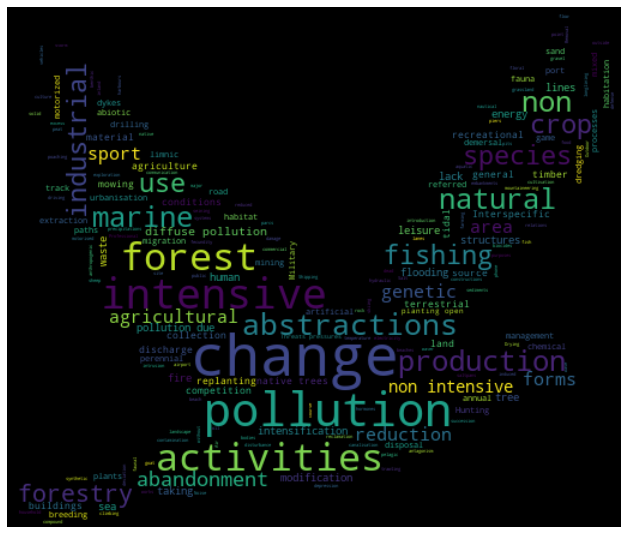

In [ ]:
text = str(df_birds['detail_menace'].unique())
text = text.replace("'","")
text = text.replace("animal","")
text = text.replace("grazing","")
text = text.replace("surface water","")
text = text.replace("removal","")
text = text.replace("water","")
text = text.replace("ground","")

wave_mask = np.array(Image.open( "/content/drive/My Drive/Formation DATA/Datasets projet rechauffement climatique/bird.jpg"))


wordcloud = WordCloud(mask=wave_mask).generate(text)
plt.figure(figsize = (11,11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


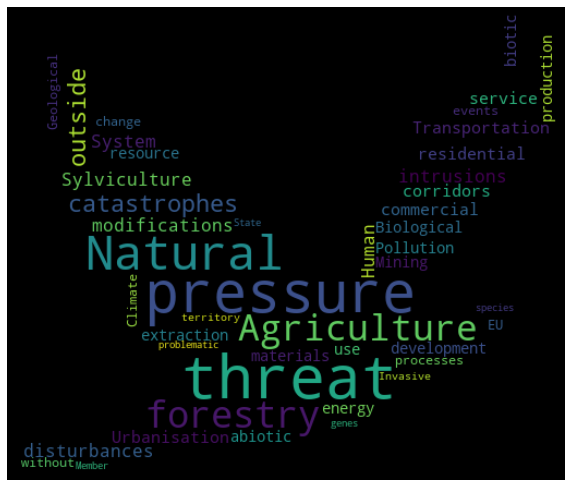

In [ ]:
text_1 = str(df_birds['categorie_menace'].unique())

text_1 = text_1.replace("'","")
text_1 = text_1.replace("Unknown","")


wave_mask_1 = np.array(Image.open( "/content/drive/My Drive/Formation DATA/Datasets projet rechauffement climatique/bird.jpg"))


wordcloud_1 = WordCloud(mask=wave_mask_1).generate(text_1)
plt.figure(figsize = (10,9))
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## **Visualisation : impact du changement climatique sur les especes, par pays**

In [ ]:
#dataframe des especes menacees pas le changement climatique a un niveau d'impact eleve et moyen
high = pd.DataFrame(df_birds[(df_birds['code_categorie_menace'] == 'M') &
                             ((df_birds['importance_menace'] == 'high importance') | (df_birds['importance_menace'] == 'high importance'))
                             ].groupby('pays').count()['speciesname'])
high.rename(columns = {'speciesname':'impact eleve/moyen du changement climatique (nb especes)'}, inplace = True)
high

,impact eleve/moyen du changement climatique (nb especes)
pays,
Austria,1
Belgium,2
Bulgaria,22
Canary Islands (ES),19
Cyprus,5
Finland,12
France,22
Germany,2
Hungary,55


In [ ]:
##dataframe des especes pour lesquelles le changement climatique a un niveau d'impact faible (low importance)
low = pd.DataFrame(df_birds[(df_birds['code_categorie_menace'] == 'M') & (df_birds['importance_menace'] == 'low importance')
                              ].groupby('pays').count()['speciesname'])
low.rename(columns = {'speciesname':'faible impact du changement climatique (nb especes)'}, inplace = True)
low

,faible impact du changement climatique (nb especes)
pays,
Bulgaria,1
Estonia,7
Finland,5
France,11
Germany,23
Hungary,22
Ireland,1
Italy,2
Latvia,1


In [ ]:
#on joint les deux dataframes afin de mettre en parallele le nb d'especes sur lesquelles le changement climatique a un impact faible
#et le nombre d'especes sur lesquelles le changement climatique a un impact eleve
#par pays de l'union europeenne

impact = high.join(low, how = 'outer')
impact

,impact eleve/moyen du changement climatique (nb especes),faible impact du changement climatique (nb especes)
pays,,
Austria,1.0,NaN
Belgium,2.0,NaN
Bulgaria,22.0,1.0
Canary Islands (ES),19.0,NaN
Cyprus,5.0,NaN
Estonia,NaN,7.0
Finland,12.0,5.0
France,22.0,11.0
Germany,2.0,23.0


In [ ]:
#on remplit les NaN avec la mediane car dans la mesure ou il y a des valeurs extremes, la mediane est plus pertinente aue la moyenne

median_low = impact.iloc[:,0].median()
impact.iloc[:,0].fillna(median_low, inplace = True)

median_high = impact.iloc[:,1].median()
impact.iloc[:,1].fillna(median_high, inplace = True)

impact

,impact eleve/moyen du changement climatique (nb especes),faible impact du changement climatique (nb especes)
pays,,
Austria,1.0,5.5
Belgium,2.0,5.5
Bulgaria,22.0,1.0
Canary Islands (ES),19.0,5.5
Cyprus,5.0,5.5
Estonia,12.0,7.0
Finland,12.0,5.0
France,22.0,11.0
Germany,2.0,23.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



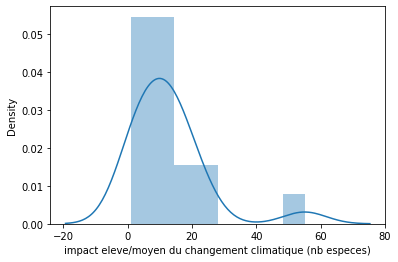

In [ ]:
sns.distplot(impact['impact eleve/moyen du changement climatique (nb especes)'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



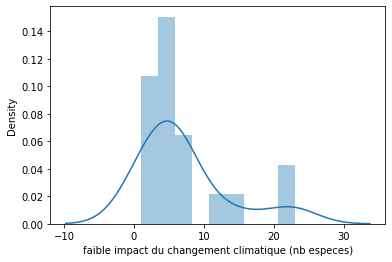

In [ ]:
sns.distplot(impact['faible impact du changement climatique (nb especes)'])

In [ ]:
impact

,impact eleve/moyen du changement climatique (nb especes),faible impact du changement climatique (nb especes)
pays,,
Austria,1.0,5.5
Belgium,2.0,5.5
Bulgaria,22.0,1.0
Canary Islands (ES),19.0,5.5
Cyprus,5.0,5.5
Estonia,12.0,7.0
Finland,12.0,5.0
France,22.0,11.0
Germany,2.0,23.0


In [ ]:
import plotly.graph_objects as go

plt.figure(figsize=(20,6))

country = impact.index

fig = go.Figure()
fig.add_trace(go.Bar(
    x=country,
    y=impact.iloc[:,0],
    name='high impact on species (nb species)',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=country,
    y=impact.iloc[:,1],
    name='low impact on species (nb species)',
    marker_color='lightsalmon'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.update_layout(
    title="Climate change impact on studied bird species, by country in UE",
    xaxis_title="country",
    yaxis_title="nb of species")

fig.show()

<Figure size 1440x432 with 0 Axes>

In [ ]:
#pourcentages
impact['perc_high'] = (impact.iloc[:,0]*100)/(impact.iloc[:,1]+impact.iloc[:,0])
impact['perc_low'] = (impact.iloc[:,1]*100)/(impact.iloc[:,1]+impact.iloc[:,0])

impact.head()

,impact eleve/moyen du changement climatique (nb especes),faible impact du changement climatique (nb especes),perc_high,perc_low
pays,,,,
Austria,1.0,5.5,15.384615,84.615385
Belgium,2.0,5.5,26.666667,73.333333
Bulgaria,22.0,1.0,95.652174,4.347826
Canary Islands (ES),19.0,5.5,77.551020,22.448980
Cyprus,5.0,5.5,47.619048,52.380952


In [ ]:
plt.figure(figsize=(20,6))

trace1=go.Bar(x=impact.index,y=impact['perc_high'],marker=dict(color='indianred',opacity=0.5),name="high impact on species (nb species)")
trace2=go.Bar(x=impact.index,y=impact['perc_low'],marker=dict(color='lightsalmon',opacity=0.5),name="low impact on species (nb species)")

data=[trace2,trace1]

layout = go.Layout(title="Climate change impact on studied bird species, by country in UE",xaxis=dict(title="countries"),yaxis=dict(title="number of species (%)"),
                   barmode="stack")

fig = go.Figure(data,layout)

fig.show()

<Figure size 1440x432 with 0 Axes>

## **Visualisation : categories de menaces et details des categories**

In [ ]:
df_birds.head(10)

,ID_espece,detail_menace,code_categorie_menace,categorie_menace,importance_menace,speciescode,speciesname,pays
0,a47d955930985690898deb8194da7ae9,Forestry activities not referred to above,B,"Sylviculture, forestry",medium importance,A030-B,Ciconia nigra,Austria
1,a47d955930985690898deb8194da7ae9,Forest and Plantation management & use,B,"Sylviculture, forestry",high importance,A030-B,Ciconia nigra,Austria
2,a47d955930985690898deb8194da7ae9,wildlife watching,G,Human intrusions and disturbances,medium importance,A030-B,Ciconia nigra,Austria
3,2461163524ca4bc60d404fdf8a1b1624,mofification of standing water bodies,J,Natural System modifications,high importance,A682-B,Charadrius alexandrinus alexandrinus,Austria
4,2461163524ca4bc60d404fdf8a1b1624,groundwater abstractions for agriculture,J,Natural System modifications,high importance,A682-B,Charadrius alexandrinus alexandrinus,Austria
5,2461163524ca4bc60d404fdf8a1b1624,"abandonment of pastoral systems, lack of grazing",A,Agriculture,medium importance,A682-B,Charadrius alexandrinus alexandrinus,Austria
6,1627f326fbab6e16c9918f3faf52be51,"Modification of hydrographic functioning, general",J,Natural System modifications,high importance,A393,Phalacrocorax pygmeus,Austria
7,1627f326fbab6e16c9918f3faf52be51,mofification of standing water bodies,J,Natural System modifications,medium importance,A393,Phalacrocorax pygmeus,Austria
8,4926bc2e1f7688e5875b043142ddd7b4,agricultural intensification,A,Agriculture,high importance,A133,Burhinus oedicnemus,Austria
9,4926bc2e1f7688e5875b043142ddd7b4,grassland removal for arable land,A,Agriculture,high importance,A133,Burhinus oedicnemus,Austria


In [ ]:
#categories de menaces
df_birds['categorie_menace'].unique()

array(['Sylviculture, forestry', 'Human intrusions and disturbances',
       'Natural System modifications', 'Agriculture',
       'Transportation and service corridors',
       'Urbanisation, residential and commercial development',
       'Biological resource use other than agriculture & forestry',
       'Pollution',
       'Mining, extraction of materials and energy production',
       'Natural biotic and abiotic processes (without catastrophes)',
       'No threats or pressures', 'Climate change',
       'Unknown threat or pressure',
       'Geological events, natural catastrophes',
       'Threats and pressures from outside the EU territory',
       'Invasive, other problematic species and genes',
       'Threats and pressures from outside the Member State'],
      dtype=object)

In [ ]:
#detail des menaces de categorie 'climate change' (ou 'M')
df_birds[df_birds['code_categorie_menace'] == 'M']['detail_menace'].unique()

array(['habitat shifting and alteration',
       'droughts and less precipitations',
       'Changes in abiotic conditions',
       'decline or extinction of species',
       'temperature changes (e.g. rise of temperature & extremes)',
       'Changes in biotic conditions',
       'flooding and rising precipitations',
       'water flow changes (limnic, tidal and oceanic)',
       'wave exposure changes', 'sea-level changes',
       'migration of species (natural newcomers)',
       'desynchronisation of processes', 'pH-changes'], dtype=object)

In [ ]:
categorie = pd.DataFrame(df_birds.groupby('categorie_menace').count()['ID_espece'].sort_values(ascending = False))
categorie

,ID_espece
categorie_menace,
Agriculture,2359
Natural System modifications,2065
Biological resource use other than agriculture & forestry,1732
Human intrusions and disturbances,1568
Pollution,1109
Natural biotic and abiotic processes (without catastrophes),950
Transportation and service corridors,927
"Sylviculture, forestry",909
"Mining, extraction of materials and energy production",871


In [ ]:
categorie.drop(labels = ['No threats or pressures','Threats and pressures from outside the EU territory','Threats and pressures from outside the Member State'], 
               axis = 0, inplace = True)
categorie.reset_index(inplace = True)
categorie

,categorie_menace,ID_espece
0,Agriculture,2359
1,Natural System modifications,2065
2,Biological resource use other than agriculture...,1732
3,Human intrusions and disturbances,1568
4,Pollution,1109
5,Natural biotic and abiotic processes (without ...,950
6,Transportation and service corridors,927
7,"Sylviculture, forestry",909
8,"Mining, extraction of materials and energy pro...",871
9,Climate change,728


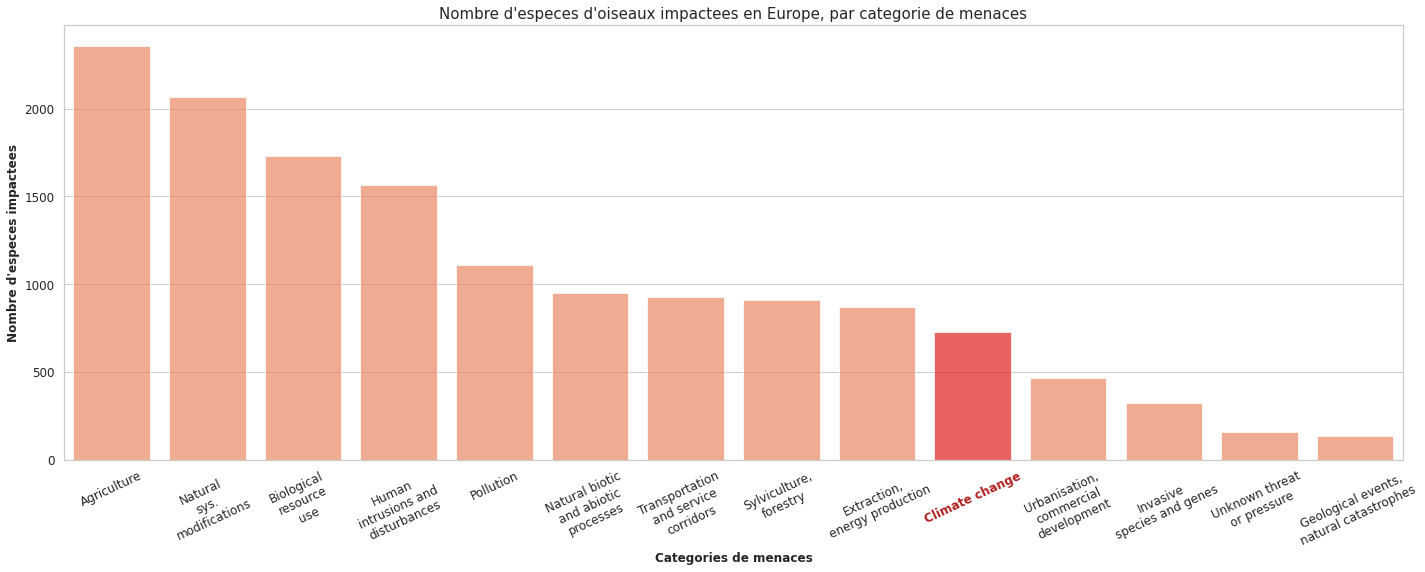

In [ ]:
plt.figure(figsize=(24,8))
# make barplot and sort bars in descending order
sns.set_theme(style="whitegrid")

graph = sns.barplot(x='categorie_menace', 
            y="ID_espece", 
            data=categorie, 
            color = 'categorie_menace',
            palette = {'Agriculture':'coral','Natural System modifications':'coral','Biological resource use other than agriculture & forestry':'coral','Human intrusions and disturbances':'coral',
                       'Pollution':'coral','Natural biotic and abiotic processes (without catastrophes)':'coral','Transportation and service corridors':'coral',
                       'Sylviculture, forestry':'coral','Mining, extraction of materials and energy production':'coral','Urbanisation, residential and commercial development':'coral',
                       'Invasive, other problematic species and genes':'coral','Unknown threat or pressure':'coral','Geological events, natural catastrophes':'coral',
                       'Climate change':'red'},
                    alpha = 0.70)

plt.xticks(np.arange(0, 14), rotation=25)

#fonction permettant de racourcir les labels de xaxis
def format_func(value, tick_number):
  if value ==0:
    return categorie.iloc[value,0]
  elif value == 1:
    return 'Natural'+'\n'+'sys.'+ '\n'+'modifications'
  elif value == 2:
    return 'Biological'+'\n'+'resource'+'\n'+'use'
  elif value == 3:
    return 'Human'+'\n'+'intrusions and'+'\n'+'disturbances'
  elif value == 4:
    return 'Pollution'
  elif value == 5:
    return 'Natural biotic'+'\n'+ 'and abiotic' +'\n'+ 'processes'
  elif value == 6:
    return 'Transportation' +'\n'+ 'and service'+'\n'+'corridors'
  elif value == 7:
    return 'Sylviculture,'+'\n'+'forestry'
  elif value == 8:
    return 'Extraction,'+'\n'+'energy production'
  elif value == 9:
    return categorie.iloc[value,0]
  elif value == 10:
    return 'Urbanisation,'+'\n'+'commercial'+'\n'+'development'
  elif value == 11:
    return 'Invasive'+'\n'+'species and genes'	
  elif value == 12:
    return 'Unknown threat'+'\n'+'or pressure'
  elif value == 13:
    return 'Geological events,'+'\n'+'natural catastrophes'	

graph.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

graph.set_title("Nombre d'especes d'oiseaux impactees en Europe, par categorie de menaces", fontsize=15)

graph.set_ylabel("Nombre d'especes impactees", fontsize=12, weight = 'bold')
graph.set_xlabel("Categories de menaces", fontsize=12, weight = 'bold')
graph.tick_params(labelsize=12)


#on fait ressortir 'climate change' dans la legende
graph.get_xticklabels()[9].set_fontweight('bold')
graph.get_xticklabels()[9].set_color('firebrick')

plt.show()

In [ ]:
detail = pd.DataFrame(df_birds[df_birds['code_categorie_menace'] == 'M'].groupby('detail_menace').count()['ID_espece'].sort_values(ascending = False))
detail

,ID_espece
detail_menace,
Changes in abiotic conditions,217
droughts and less precipitations,163
Changes in biotic conditions,119
temperature changes (e.g. rise of temperature & extremes),71
habitat shifting and alteration,60
decline or extinction of species,34
sea-level changes,19
flooding and rising precipitations,18
migration of species (natural newcomers),14


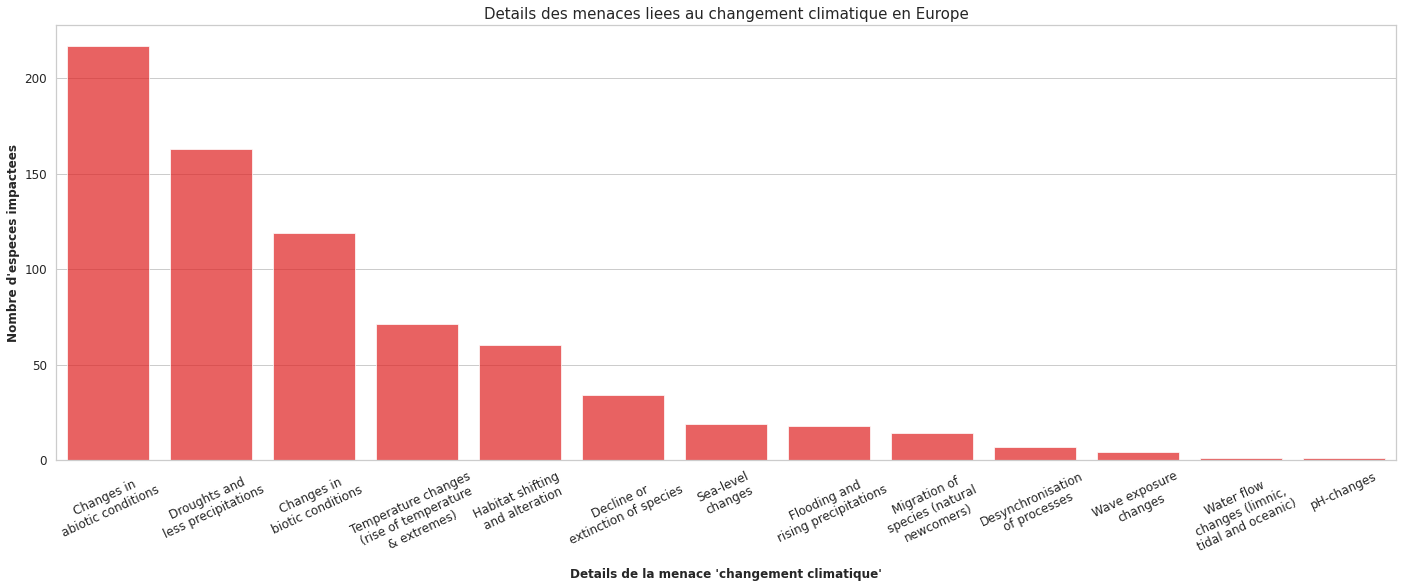

In [ ]:
#taille et theme
plt.figure(figsize=(24,8))
sns.set_theme(style="whitegrid")


#figure

graph_2 = sns.barplot(x=detail.index, 
            y="ID_espece", 
            data=detail,
            alpha = 0.70, color = "red")

#titre, legende, rotation

#fonction permettant de racourcir les labels de xaxis
def format_func_2(value, tick_number):
  if value ==0:
    return 'Changes in'+'\n'+'abiotic conditions'
  elif value == 1:
    return 'Droughts and'+'\n'+'less precipitations'	
  elif value == 2:
    return 'Changes in'+'\n'+'biotic conditions'
  elif value == 3:
    return 'Temperature changes'+'\n'+'(rise of temperature'+'\n'+'& extremes)'
  elif value == 4:
    return 'Habitat shifting'+'\n'+'and alteration'
  elif value == 5:
    return 'Decline or'+'\n'+'extinction of species'	
  elif value == 6:
    return 'Sea-level'+'\n'+'changes'
  elif value == 7:
    return 'Flooding and'+'\n'+'rising precipitations'
  elif value == 8:
    return 'Migration of'+'\n'+'species (natural'+'\n'+'newcomers)'
  elif value == 9:
    return 'Desynchronisation'+'\n'+'of processes'
  elif value == 10:
    return 'Wave exposure'+'\n'+'changes'
  elif value == 11:
    return 'Water flow'+'\n'+'changes (limnic,'+'\n'+'tidal and oceanic)'
  elif value == 12:
    return 'pH-changes'	


my_range=range(0,len(detail.index))
plt.xticks(my_range,detail.index, rotation=25)

graph_2.xaxis.set_major_formatter(plt.FuncFormatter(format_func_2))


plt.title("Details des menaces liees au changement climatique en Europe", fontsize=15)

plt.ylabel("Nombre d'especes impactees", fontsize=12, weight = 'bold')
plt.xlabel("Details de la menace 'changement climatique'", fontsize=12, weight = 'bold')
plt.tick_params(labelsize=12)




plt.show()
